In [2]:
%load_ext autoreload

%autoreload 2

In [3]:
from glob import glob
import os
import pickle

import scipy.linalg
import matplotlib.pyplot as plt

import emcee

import kepler
import threebody

import minuit_wrap
%matplotlib inline

In [4]:
import logging
logger = logging.getLogger()

#logger.setLevel(logging.DEBUG)
fh = logging.FileHandler("fitting.log")
formatter = logging.Formatter('%(asctime)s - %(module)s:%(funcName)s:%(lineno)s - %(message)s')
fh.setFormatter(formatter)
logger.addHandler(fh)


In [5]:
# numpy binds itself to one CPU; unbind it
#import os
#os.system("taskset -p 0xff %d" % os.getpid());

In [6]:
#import matplotlib
#matplotlib.rcParams['savefig.dpi'] = 120

In [26]:
#F = threebody.Fitter("0337+17-scott-2013-06-06",tzrmjd_middle='weighted',priors=['dbeta','dgamma'],ppn_mode='heavysimple')
#F = threebody.Fitter("0337+17-scott-2013-06-06",
#    tzrmjd_middle='weighted',priors=['dbeta','dgamma'],
#    use_quad=True,tol=1e-20,ppn_mode='heavysimple')
#F = threebody.Fitter("0337+17-scott-2013-06-06",tzrmjd_middle='weighted',
#    only_tels=['AO1440','AO1350','GBT1500'],
#    ppn_mode='heavysimple')
#F = threebody.Fitter("0337+17-scott-2013-06-06",tzrmjd_middle='weighted',
#    only_tels=['WSRT1400'],
#    ppn_mode='heavysimple')
#F = threebody.Fitter(files="0337+17-scott-2013-08-29",tzrmjd_middle='weighted',
#                     parfile="0337_tempo2_nobinary.par",
#                     fit_pos=True,
#                     ppn_mode='GR')
#F = threebody.Fitter(files="0337+17-scott-2013-08-29",tzrmjd_middle='auto',
#                     parfile="0337_modified.par",
#                     fit_pos=True,
#                     fit_pm=True,
#                     fit_px=True,
#                     t2_astrometry=True,
#                     ppn_mode='GR')
#F = threebody.Fitter(files="0337+17-scott-2013-08-29",tzrmjd_middle='auto',
#                     parfile="0337_modified.par",
#                     fit_pos=True,
#                     fit_pm=True,
#                     fit_px=True,
#                     t2_astrometry=True,
#                     kopeikin=True,
#                     ppn_mode='heavysimple')
if False:
    fitter_params = dict(files="0337+17-scott-2013-08-29",tzrmjd_middle='auto',
                     parfile="0337_tempo2_pm.par",
                     fit_pos=True,
                     fit_pm=False,
                     fit_px=True,
                     t2_astrometry=True,
                     kopeikin=True,
                     priors=('dbeta','dgamma'),
                     ppn_mode='heavysimple')
elif False:
    fitter_params = dict(files="0337+17-scott-2013-08-29",tzrmjd_middle='auto',
                     parfile="0337_tempo2_pm.par",
                     fit_pos=True,
                     fit_pm=False,
                     fit_px=True,
                     t2_astrometry=True,
                     kopeikin=True,
                     shapiro=False,
                     priors=('dbeta','dgamma'),
                     ppn_mode='heavysimple')
elif False:
    fitter_params = dict(files="0337+17-scott-2013-08-29",tzrmjd_middle='auto',
                     parfile="0337_tempo2_pm.par",
                     fit_pos=True,
                     fit_pm=False,
                     fit_px=True,
                     t2_astrometry=True,
                     kopeikin=True,
                     general=False,
                     priors=('dbeta','dgamma'),
                     ppn_mode='heavysimple')
elif False:
    fitter_params = dict(files="0337+17-scott-2013-08-29",tzrmjd_middle='auto',
                     parfile="0337_tempo2_pm.par",
                     fit_pos=True,
                     fit_pm=False,
                     fit_px=True,
                     t2_astrometry=True,
                     kopeikin=True,
                     ppn_mode=None)
elif False:
    fitter_params = dict(files="0337+17-scott-2013-08-29",tzrmjd_middle='auto',
                     parfile="0337_tempo2_px.par",
                     fit_pos=True,
                     fit_pm=False,
                     fit_px=True,
                     t2_astrometry=True,
                     kopeikin=True,
                     ppn_mode='GR')
elif False:
    fitter_params = dict(files="0337+17-scott-2013-08-29",tzrmjd_middle='auto',
                     parfile="0337_tempo2_pm.par",
                     fit_pos=True,
                     fit_pm=False,
                     fit_px=True,
                     t2_astrometry=True,
                     kopeikin=True,
                     ppn_mode='GR')
elif False:
    fitter_params = dict(files="0337+17-scott-2014-01-22",
                     tzrmjd_middle='auto',
                     parfile="0337_tempo2_px_optical.par",
                     fit_pos=True,
                     fit_pm=False,
                     fit_px=False,
                     t2_astrometry=True,
                     kopeikin=True,
                     ppn_mode='GR')
elif False:
    fitter_params = dict(files="0337+17-scott-2014-01-22",
                     tzrmjd_middle='auto',
                     parfile="0337_tempo2_px_optical.par",
                     fit_pos=True,
                     fit_pm=False,
                     fit_px=False,
                     t2_astrometry=True,
                     kopeikin=False,
                     ppn_mode='GR')
elif False:
    fitter_params = dict(files="0337+17-scott-2014-01-22",
                     tzrmjd_middle='auto',
                     parfile="0337_tempo2_px_optical.par",
                     fit_pos=True,
                     fit_pm=False,
                     fit_px=False,
                     t2_astrometry=True,
                     kopeikin=False,
                     priors=('dbeta','dgamma'),
                     ppn_mode='heavysimple')
elif False:
    fitter_params = dict(files="0337+17-anne-2014-01-28",
                     tzrmjd_middle='auto',
                     parfile="0337_tempo2_px_optical.par",
                     fit_pos=True,
                     fit_pm=False,
                     fit_px=False,
                     t2_astrometry=True,
                     kopeikin=False,
                     priors=('dbeta','dgamma'),
                     ppn_mode='heavysimple')
elif False:
    fitter_params = dict(files="0337+17-anne-2014-02-04c",
                     tzrmjd_middle='auto',
                     parfile="0337_tempo2_px_optical.par",
                     fit_pos=True,
                     fit_pm=False,
                     fit_px=False,
                     t2_astrometry=True,
                     kopeikin=False,
                     ppn_mode='GR')
elif False:
    fitter_params = dict(files="0337+17-anne-2014-02-04c",
                     tzrmjd_middle='auto',
                     parfile="0337_tempo_px_optical.par",
                     fit_pos=False,
                     fit_pm=False,
                     fit_px=False,
                     t2_astrometry=True,
                     kopeikin=False,
                     ppn_mode='GR')
elif False:
    fitter_params = dict(files="0337+17-anne-2014-09-22",
                     tzrmjd_middle='auto',
                     parfile="0337_tempo_px_optical.par",
                     fit_pos=True,
                     fit_pm=False,
                     fit_px=False,
                     t2_astrometry=True,
                     kopeikin=False,
                     ppn_mode='GR')
elif False:
    fitter_params = dict(files="0337+17-anne-2014-09-22",
                     tzrmjd_middle='auto',
                     parfile="0337_tempo2_px_optical.par",
                     fit_pos=True,
                     fit_pm=False,
                     fit_px=False,
                     t2_astrometry=True,
                     kopeikin=False,
                     priors=('dbeta','dgamma'),
                     ppn_mode='heavysimple')
elif False:
    fitter_params = dict(files="0337+17-anne-2014-09-29",
                     tzrmjd_middle='auto',
                     parfile="0337_tempo2_px_optical.par",
                     fit_pos=True,
                     fit_pm=False,
                     fit_px=False,
                     t2_astrometry=True,
                     kopeikin=False,
                     priors=('dbeta','dgamma'),
                     ppn_mode='heavysimple')
elif False:
    fitter_params = dict(files="0337+17-anne-2014-09-22",
                     tzrmjd_middle='auto',
                     parfile="0337_tempo2_px_optical.par",
                     fit_pos=True,
                     fit_pm=False,
                     fit_px=False,
                     t2_astrometry=True,
                     kopeikin=False,
                     only_tels=('GBT1500','WSRT1400'),
                     priors=('dbeta','dgamma'),
                     ppn_mode='heavysimple')
elif False:
    fitter_params = dict(files="0337+17-anne-2014-09-22",
                     tzrmjd_middle='auto',
                     parfile="0337_tempo2_px_optical.par",
                     fit_pos=True,
                     fit_pm=False,
                     fit_px=False,
                     t2_astrometry=True,
                     efac=(('AO1440',1.45),
                           ('GBT1500',1.11),
                           ('WSRT1400',1.45)),
                     kopeikin=False,
                     priors=('dbeta','dgamma'),
                     ppn_mode='heavysimple')
elif False:
    fitter_params = dict(files="0337_6vec_table_150131_pulses.fits",
                     tzrmjd_middle='auto',
                     fit_pos=False,
                     fit_pm=False,
                     fit_px=False,
                     t2_astrometry=False,
                     efac=(('AO1440',1.45),
                           ('GBT1500',1.11),
                           ('GBT1500s',1.11),
                           ('WSRT1400',1.45)),
                     kopeikin=False,
                     priors=('dbeta','dgamma'),
                     linear_jumps=True,
                     ppn_mode='heavysimple')
elif False:
    fitter_params = dict(files="0337+17-anne-2014-09-22",
                     tzrmjd_middle='auto',
                     parfile="0337_tempo2_px_optical.par",
                     fit_pos=True,
                     fit_pm=True,
                     fit_px=True,
                     t2_astrometry=True,
                     efac=(('AO1440',1.45),
                           ('GBT1500',1.11),
                           ('WSRT1400',1.45)),
                     kopeikin=False,
                     priors=('dbeta','dgamma'),
                     ppn_mode='heavysimple')
elif True:
    fitter_params = dict(files="0337+17-anne-2014-09-22",
                     tzrmjd_middle='auto',
                     parfile="0337_tempo2_px_optical.par",
                     fit_pos=True,
                     fit_pm=True,
                     fit_px=True,
                     t2_astrometry=True,
                     efac=(('AO1440',1.45),
                           ('GBT1500',1.11),
                           ('WSRT1400',1.45)),
                     kopeikin=False,
                     priors=('dbeta','dgamma'),
                     ppn_mode='heavysimple')
else:
    runid = "7983"
    fitter_params = pickle.load(open("emcee-chains/%s.nimrod/fitter_params.pickle" % runid))
#F = threebody.Fitter("0337+17-scott-2013-06-06",tzrmjd_middle='weighted',ppn_mode='GR')
#F = threebody.Fitter("0337+17-scott-2013-06-06",tzrmjd_middle='weighted',general=False,ppn_mode='GR')
#F = threebody.Fitter("0337+17-scott-2013-06-06",tzrmjd_middle=True)
with open("fitter_params.pickle","wb") as f:
    pickle.dump(fitter_params,f)
F = threebody.Fitter(**fitter_params)

In [27]:
F.tel_list, len(F.mjds)

(['AO1440', 'GBT1500', 'WSRT1400'], 34570)

In [28]:
print F.parameters
print len(F.parameters)

['asini_i', 'pb_i', 'eps1_i', 'eps2_i', 'tasc_i', 'acosi_i', 'q_i', 'asini_o', 'pb_o', 'eps1_o', 'eps2_o', 'tasc_o', 'acosi_o', 'delta_lan', 'delta', 'dgamma', 'dbeta', 'd_RAJ', 'd_DECJ', 'd_PMRA', 'd_PMDEC', 'd_PX', 'j_AO1440', 'j_GBT1500']
24


In [29]:
F.best_parameters

{'acosi_i': 1.4908646291229854471,
 'acosi_o': 91.462096717677266948,
 'asini_i': 1.2175235157278100291,
 'asini_o': 74.672544317576733962,
 'd_DECJ': 3.3051655762772815761e-07,
 'd_PMDEC': 5.4388900807450304949e-10,
 'd_PMRA': -1.224982018501526943e-10,
 'd_PX': 0.13493845989349860515,
 'd_RAJ': -5.774486778604892854e-08,
 'dbeta': 0.00024941732279330518386,
 'delta': -2.5970252962828613829e-06,
 'delta_lan': 2.2376751101362222439e-06,
 'dgamma': 3.5982842019324150652e-06,
 'eps1_i': 0.00068979641917213052497,
 'eps1_o': 0.035185583677067633576,
 'eps2_i': -9.1383856624465516534e-05,
 'eps2_o': -0.0034643325179809715897,
 'f0': 365.95336311711874974,
 'j_AO1350': 5.364017648361716e-05,
 'j_AO1440': -0.00055118737802055722056,
 'j_AO327': 6.457616019511097e-05,
 'j_GBT1500': -0.00053772415903362277698,
 'j_GBT350': 1.8912917353649655e-05,
 'j_GBT820': 6.712253154451129e-05,
 'j_NCY1400': 0.000675,
 'j_WSRT350': -3.6063906052781444e-05,
 'pb_i': 1.6293884869075564751,
 'pb_o': 327.25601

In [30]:
if 'j_NCY1400' not in F.best_errors:
    F.best_errors['j_NCY1400'] = F.best_errors['j_GBT1500']
if 'j_GBT1500s' not in F.best_parameters:
    F.best_parameters['j_GBT1500s'] = F.best_parameters['j_GBT1500']
if 'j_GBT1500s' not in F.best_errors:
    F.best_errors['j_GBT1500s'] = F.best_errors['j_GBT1500']
 

In [31]:
#for n in threebody.astro_names:
#    F.best_parameters[n] = 0

In [32]:
#F.best_parameters['d_PX'] = 0
#F.best_parameters['pm_x'] = 0
#F.best_parameters['pm_y'] = 0


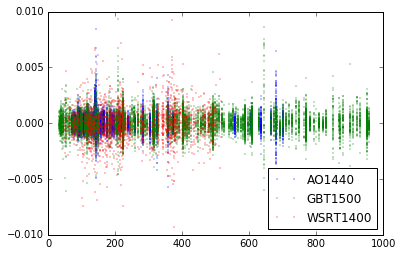

In [33]:
rload = F.residuals(F.best_parameters)
for ti, t in enumerate(F.tel_list):
    c = F.tels == ti
    plt.plot(F.mjds[c], rload[c], 
             ".", markersize=1, label=t)
plt.legend(loc="best")
plt.show()

In [34]:
mfun = F.make_mfun()

In [35]:
mfun(*[F.best_parameters[p] for p in F.parameters])

33731.261732194856009

In [36]:
-2*F.efac**2*(F.lnprob(F.best_parameters)+F.lnprior(F.best_parameters))

33799.142419950165674

In [37]:
M = minuit_wrap.Fitter(F.make_mfun())

In [38]:
for p in F.parameters:
    M.values[p] = F.best_parameters[p]
    M.errors[p] = F.best_errors[p]
M.set_normalization()

In [39]:
if False:
    for p in F.parameters:
        if not p.startswith("j_"):
            M.fixed[p] = True


In [40]:
#if F.linear_jumps:
#    print "linear jumps"
#    for p in F.parameters:
#        if p.startswith("j_"):
#            M.fixed[p] = True


In [ ]:
if False:
    for p in F.parameters:
        M.fixed[p] = False

In [ ]:
M.best_filename = "fitter_best_values.pickle"
M.tol = 100
M.eps = 1e-6
M.strategy = 1
M.printMode = 3
M.migrad()

In [ ]:
M.tol = 100
M.eps = 1e-6
M.strategy = 1
M.printMode = 3
M.simplex()

In [ ]:
for (i,p) in enumerate(F.parameters):
    M.values[p] = M.best_values[p]
    M.errors[p] = F.best_errors[p]
M.set_normalization() 

In [ ]:
best_so_far = np.load("emcee-chains/1045.nimrod/best_so_far.npy")
for (i,p) in enumerate(F.parameters):
    M.values[p] = best_so_far[i]
    M.errors[p] = F.best_errors[p]
M.set_normalization()    

In [ ]:
M.tol = 100
M.eps = 1e-6
M.strategy = 1
M.printMode = 3
M.migrad()

In [ ]:
for p in F.parameters:
    print p, (M.best_values[p]-F.best_parameters[p])/F.best_errors[p]

In [ ]:
M.best_values

In [ ]:
mfun(*[M.best_values[p] for p in F.parameters])

In [ ]:
if False:
    import cPickle as pickle
    with open(M.best_filename,"wb") as f:
        pickle.dump(M.best_values, f)

In [ ]:
M._minuit.errors

In [ ]:
new_walkers = np.load("emcee-chains/845.nimrod/new_walkers.npy")
new_walkers = new_walkers.reshape((-1,new_walkers.shape[-1]))
new_walkers -= np.mean(new_walkers,axis=0)
delta = new_walkers[np.random.randint(new_walkers.shape[0])]
for (i,p) in enumerate(F.parameters):
    M.values[p] = M.best_values[p] + delta[i]
    M.errors[p] = F.best_errors[p]
M.set_normalization() 